# Investigating Fandago Movie Ratings

The online movie ratings aggregator, Fandango, has previously been found to skew their movie ratings upwards (on a scale of 1-5 stars) compared to the true ratings on the movies. These results, first found by journalist Walt Hickey in 2015, were supposedly corrected by Fandago in recent years.

This project will aim to analyze [more recent](https://github.com/mircealex/Movie_ratings_2016_17) film ratings (2016-2017) data to examine if the rating behavior from Fandango has truly been corrected from the previous [data](https://github.com/fivethirtyeight/data/tree/master/fandango).

### Exploring the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

%matplotlib inline

In [3]:
original = pd.read_csv('fandango_score_comparison.csv')
recent = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
print(original.columns)
print('\n\n')
print(recent.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')



Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


Let's narrow our data to useful metrics.

In [5]:
rel_original = original[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
rel_recent = recent[['movie', 'year', 'fandango']].copy()

In [6]:
rel_original.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [7]:
rel_recent.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


## A Represented Population?

The population of interest for reaching our goal with this anaylsis would ideally be data that includes ratings for all movies on Fandangos website, regardless of the year the movie was released.

This data would provide us with original parameters of Fandango ratings that would be examined to see if they have changed. I.e. Have the ratings of movies changed to be less skewed in recent years as Fandango has promised?

Based on the README.md file from Hickey's original data, the sampling of movies was not random. In fact, they had to have a threshold of user fan ratings and had to have tickets on sale in 2015. This leads to a concern about the representation of our population of intrest. Some of these films and ratings could and likely would have changed as time changed, allowing for potential misrepresentation of the population.

Similarly from the README.md file from the more recent data, the sampling of movies was only taken for films released after 2016 and also needed a certain threshold of fan ratings. This also means the population of interest might be misrepresented for this analysis.

#### Not Quite.
Given both these sets may have changing trends overtime. It is unwise to make a conclusion for the original goal of this analysis. However, we can alter the goal to serve as a proxy for our analysis that is less vulnerable to the time-changing trends.

## A New Goal

The data can be analyized to find any difference in ratings for movies between 2015 and 2016 that were highly rated on Fandango, if any. This allows us to make a conclusion of a more well represented population while remaining a proxy to the original goal.

### Populations of Interest

- Fandango Ratings for popular movies released in 2015
- Fandango Ratings for popular movies released in 2016

Unfortunately, some of the data doesn't provide information about what constitutes 'popular'. However, Hickey's original research denoted a popular movie as having 30 or more fan ratings; this is an okay baseline to use.

We can check if the second data set is still a good representation of the population, by examining the current number of fan ratings on fandangos website of a random sample of the population. If there is a majority of these films currently considered popular then we can move forward.

*At the time of this analysis, the type of movie ratings have changed on Fandago and we are unable to check. It is assumed the population is still representative based on similar aggregate website fan reviews.

In [8]:
rel_recent.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Let's double check that our data only includes movies released in 2015 and 2016. We will need to isolate the year of release from the original dataset by looking at the FILM title.

In [9]:
rel_original['FILM'].head()
rel_original['Year'] = rel_original['FILM'].str[-5:-1]

In [10]:
rel_original['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
rel_recent['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Since there are movies from different years in both sets, let's isolate the ones from 2015 and 2016 by copying them into a new dataframe.

In [12]:
f_2015 = rel_original[ rel_original['Year'] == '2015'].copy()
f_2016 = rel_recent[ rel_recent['year'] == 2016].copy()

In [13]:
f_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [14]:
f_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distributions of 2015 and 2016 

To get a general idea of how ratings have changd from one year to the next we can use kernal density plots.

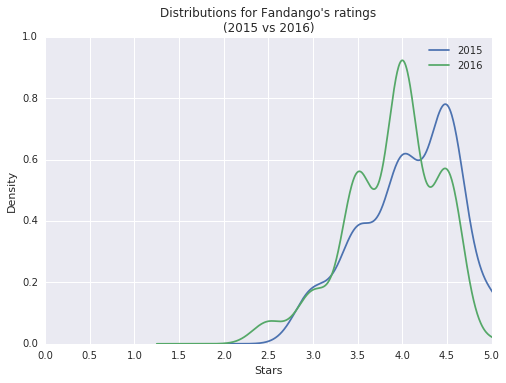

In [15]:

f_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
f_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title('Distributions for Fandango\'s ratings\n(2015 vs 2016)')
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

It seems both distributions are strongly left skewed, but the data from 2016 is shifted leftwards compared to the data of 2015.

This might indicate the ratings used by Fandango have changed from 2015 to 2016. We can also tell by how much these ratings have changed, but not necessarily why they have changed. Overall, movies have lower ratings in 2016 than in 2015.

## Comparing Relative Frequencies

Let's take a more granular look at the data. This distributions are a good place to start but don't answer the question with rigorous enough detail.

In [16]:
f_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
f_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

There were lower overall high ratings (4.5 and 5 stars) in 2016 compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was nearly to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

Oddly enough, some rating percentages went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. The increase in high ratings (3.5 and 4.0 stars) challenges the direction of change we saw on the kernel density plots. This will need further examination.

## Determining the Direction of Change

We can compute summary statistics of both data sets to obtain a more precise understanding of the way movie statistics have changed between years.

#### Mean, Median, and Mode

In [18]:
mean_2015 = f_2015['Fandango_Stars'].mean()
mean_2016 = f_2016['fandango'].mean()

median_2015 = f_2015['Fandango_Stars'].median()
median_2016 = f_2016['fandango'].median()

mode_2015 = f_2015['Fandango_Stars'].mode()[0]
mode_2016 = f_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


#### Visualization

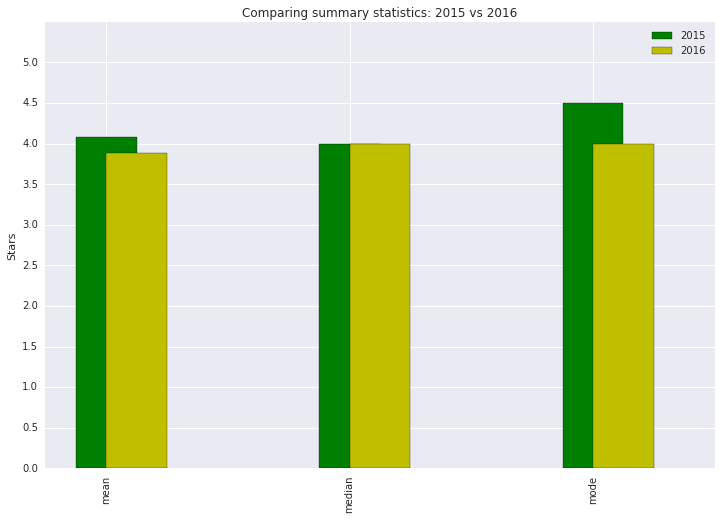

In [23]:

summary['2015'].plot.bar(color='g', label='2015', width=.25)
summary['2016'].plot.bar(color='y', align='edge', label='2016', width=.25, figsize = (12,8))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend()
plt.show()

On average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

This analysis showed there is a slight difference between Fandango's ratings for popular movies between 2015 and 2016. On average, popular movies released in 2016 were rated lower on Fandango than in 2015.

Although there is no verication as to why the changes occured, it is definitely possible Fandango fixed their biased rating system after Hickey's analysis.